In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
dir='D:/fishessss'
classes = [i for i in os.listdir(dir)]
classes

['Bam(Wam,Eel)',
 'Bangda(Mackerel)',
 'Black Pamplet',
 'Bombil',
 'China Rohu',
 'Katla',
 'Lempa',
 'Maral',
 'Mirgal(American Rohu)',
 'Mohri',
 'Pahadi(Red Snapper)',
 'Pankaj(local surmai)',
 'Prawn',
 'Rawas',
 'Rohu',
 'Roopchand',
 'Singhara',
 'Surmai',
 'Tilapia(Chilapi)',
 'White Pamplet']

In [4]:
processed_images='D:/PreProcessed_Dataset/'
img_label=[]
img_path=[]
for dirname, _ ,filenames in os.walk(processed_images):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png' or os.path.splitext(filename)[-1]=='.jpg' or os.path.splitext(filename)[-1]=='.jpg':
            img_label.append(os.path.split(dirname)[-1])
            img_path.append(os.path.join(dirname,filename))      

In [5]:
img_df=pd.DataFrame(columns=['path','label'])
img_df['path']= img_path
img_df['label']= img_label
img_df

,path,label
0,"D:/PreProcessed_Dataset/Bam(Wam,Eel)\1.png","Bam(Wam,Eel)"
1,"D:/PreProcessed_Dataset/Bam(Wam,Eel)\10.png","Bam(Wam,Eel)"
2,"D:/PreProcessed_Dataset/Bam(Wam,Eel)\11.png","Bam(Wam,Eel)"
3,"D:/PreProcessed_Dataset/Bam(Wam,Eel)\12.png","Bam(Wam,Eel)"
4,"D:/PreProcessed_Dataset/Bam(Wam,Eel)\13.png","Bam(Wam,Eel)"
...,...,...
1684,D:/PreProcessed_Dataset/White Pamplet\1685.png,White Pamplet
1685,D:/PreProcessed_Dataset/White Pamplet\1686.png,White Pamplet
1686,D:/PreProcessed_Dataset/White Pamplet\1687.png,White Pamplet
1687,D:/PreProcessed_Dataset/White Pamplet\1688.png,White Pamplet


In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df= train_test_split(img_df,train_size=0.8, shuffle=True, random_state =42)

In [7]:
print(img_df.shape)
print(train_df.shape)
print(test_df.shape)

(1689, 2)
(1351, 2)
(338, 2)


In [14]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet import preprocess_input

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocess_input, validation_split= 0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocess_input)

In [17]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=True, seed=42, subset='validation')
test_images = train_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=False)

Found 1081 validated image filenames belonging to 20 classes.
Found 270 validated image filenames belonging to 20 classes.
Found 338 validated image filenames belonging to 20 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Icon\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input 

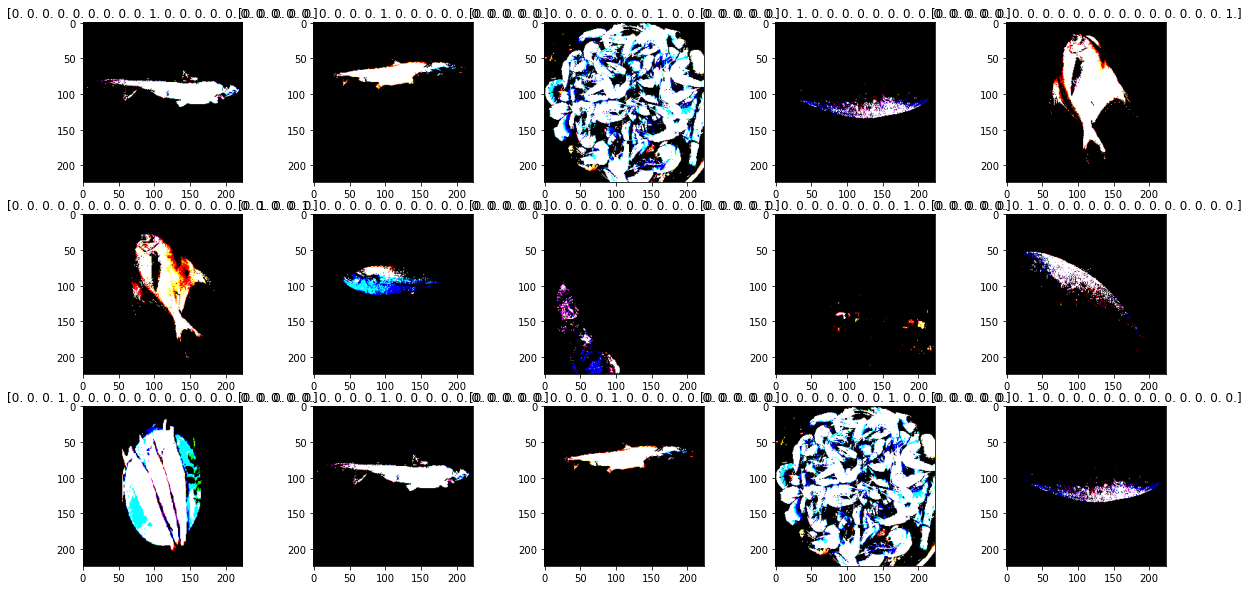

In [110]:
fit, ax=plt.subplots(nrows=3, ncols=5, figsize=(20,10))
ax=ax.flatten()
j=0
for _ in range (15):
    img, label=test_images.next()
    ax[j].imshow(img[0])
    ax[j].set_title(label[0])
    j=j+1

In [18]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=20,

                   weights='imagenet')
pretrained_model.trainable=False

In [19]:
inputs= pretrained_model.input

x= tf.keras.layers.Dense(128,activation='relu')(pretrained_model.output)
x= tf.keras.layers.Dense(128,activation='relu')(x)
outputs= tf.keras.layers.Dense(20,activation='softmax')(x)

model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(train_images,
                   validation_data=val_images,
                   epochs = 10)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [25]:
result=model.evaluate(test_images, verbose=0)
print('Test Loss: {:.5f}'.format(result[0]))
print('Test Accuracy: {:.2f}%'.format(result[1]*100))

Test Loss: 0.49554
Test Accuracy: 88.76%


In [29]:
pred=model.predict(test_images)
pred= np.argmax(pred, axis=1)

11/11 [==============================] - 212s 19s/step


In [30]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']= pred_df['pred'].apply(lambda x: labels[x])

In [31]:
pred_df.reset_index(drop=True).head(20)

,path,label,pred
0,D:/PreProcessed_Dataset/Mohri\959.png,Mohri,Mohri
1,D:/PreProcessed_Dataset/White Pamplet\1635.png,White Pamplet,White Pamplet
2,D:/PreProcessed_Dataset/Lempa\753.png,Lempa,Lempa
3,D:/PreProcessed_Dataset/Surmai\1423.png,Surmai,Surmai
4,D:/PreProcessed_Dataset/Lempa\765.png,Lempa,Lempa
5,D:/PreProcessed_Dataset/Bangda(Mackerel)\128.png,Bangda(Mackerel),Bangda(Mackerel)
6,D:/PreProcessed_Dataset/Tilapia(Chilapi)\1542.png,Tilapia(Chilapi),Tilapia(Chilapi)
7,D:/PreProcessed_Dataset/Black Pamplet\384.png,Black Pamplet,Black Pamplet
8,D:/PreProcessed_Dataset/Mohri\980.png,Mohri,Mohri
9,D:/PreProcessed_Dataset/Bangda(Mackerel)\119.png,Bangda(Mackerel),Bangda(Mackerel)


In [32]:
model.save("ResNet50_88.76.h5")

In [9]:
import PIL as image_lib
import tensorflow as tf
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [49]:
test_path='D:\Test images'

In [10]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    processed_images,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1689 files belonging to 20 classes.
Using 1352 files for training.


In [11]:
img_height,img_width=224,224
batch_size=32
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    processed_images,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1689 files belonging to 20 classes.
Using 337 files for validation.


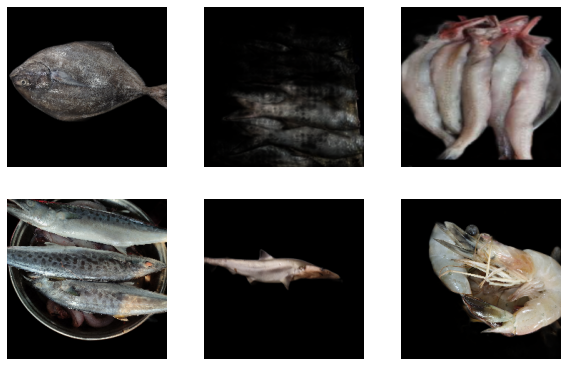

In [63]:
import matplotlib.pyplot as plotter_lib

plotter_lib.figure(figsize=(10, 10))

epochs=10

for images, labels in train_ds.take(1):

  for var in range(6):

    ax = plt.subplot(3, 3, var + 1)

    plotter_lib.imshow(images[var].numpy().astype("uint8"))

    plotter_lib.axis("off")

In [15]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(224,224,3),

                   pooling='avg',classes=20,

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 4s 0us/step


In [17]:
resnet_model.add(Flatten())

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(20, activation='softmax'))

In [20]:
resnet_model.summary()
resnet_model.compile(optimizer=Adam(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
Total params: 23,869,076
Trainable params: 281,364
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10
43/43 [==================

In [22]:
test_path='D:\Test images'
pred=resnet_model.predict(test_path)
pred= np.argmax(pred, axis=1)

NameError: name 'resnet_model' is not defined

In [102]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']= pred_df['pred'].apply(lambda x: labels[x])

In [103]:
pred_df.reset_index(drop=True).head(20)

,path,label,pred
0,D:/PreProcessed_Dataset/Mohri\959.png,Mohri,Surmai
1,D:/PreProcessed_Dataset/White Pamplet\1635.png,White Pamplet,Bombil
2,D:/PreProcessed_Dataset/Lempa\753.png,Lempa,Surmai
3,D:/PreProcessed_Dataset/Surmai\1423.png,Surmai,Surmai
4,D:/PreProcessed_Dataset/Lempa\765.png,Lempa,Surmai
5,D:/PreProcessed_Dataset/Bangda(Mackerel)\128.png,Bangda(Mackerel),Bombil
6,D:/PreProcessed_Dataset/Tilapia(Chilapi)\1542.png,Tilapia(Chilapi),Bombil
7,D:/PreProcessed_Dataset/Black Pamplet\384.png,Black Pamplet,Bombil
8,D:/PreProcessed_Dataset/Mohri\980.png,Mohri,Bombil
9,D:/PreProcessed_Dataset/Bangda(Mackerel)\119.png,Bangda(Mackerel),Surmai


In [33]:
from tensorflow.keras.preprocessing import image   #2/5
folder_path="D:/Test images/Roopchand/"
for i in range(1,6,1):
    img_path= os.path.join(folder_path,str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(224, 224))
    # turn it into a numpy array
    x = image.img_to_array(img)
    xs = np.expand_dims(x, axis=0)
    pred=model.predict(xs)
    xs = tf.keras.applications.mobilenet_v2.preprocess_input(xs)
    print(np.argmax(pred, axis=1))

1/1 [==============================] - 4s 4s/step
[15]
1/1 [==============================] - 1s 723ms/step
[15]
1/1 [==============================] - 1s 693ms/step
[5]
1/1 [==============================] - 1s 533ms/step
[12]
1/1 [==============================] - 1s 580ms/step
[15]


In [48]:
from tensorflow.keras.preprocessing import image   #2/5
folder_path="D:/Test images/Mohri/"
for i in range(2,6,1):
    img_path= os.path.join(folder_path,str(i)+'.jpg')
    img = image.load_img(img_path, target_size=(224, 224))
    # turn it into a numpy array
    x = image.img_to_array(img)
    xs = np.expand_dims(x, axis=0)
    pred=model.predict(xs)
    xs = tf.keras.applications.mobilenet_v2.preprocess_input(xs)
    print(np.argmax(pred, axis=1))

1/1 [==============================] - 0s 200ms/step
[0]
1/1 [==============================] - 0s 189ms/step
[3]
1/1 [==============================] - 0s 196ms/step
[16]
1/1 [==============================] - 0s 210ms/step
[9]
